# Arian Mohammadkhani - 810603136
# Homework 4

The goal of this exercise is to familiarize with the structure of Multilayer Perceptron (MLP) and Deep Convolutional Network (CNN) and to compare their performance in multi-class classification applications. For this purpose, two datasets are used, one with a vector structure and the other in image format. These two datasets are introduced below.

In [40]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten ,Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, GlobalAveragePooling2D , SpatialDropout2D 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import Adam
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import xml.etree.ElementTree as ET
import os

# Part One: HAR U Data Set

In [41]:
folder_path1 = "UCI HAR Dataset/UCI HAR Dataset"


Xtrain1 = np.loadtxt(f"{folder_path1}/train/X_train.txt")
ytrain1 = np.loadtxt(f"{folder_path1}/train/y_train.txt")
X_val1 = np.loadtxt(f"{folder_path1}/test/X_test.txt")
y_val1 = np.loadtxt(f"{folder_path1}/test/y_test.txt")

ytrain1 = ytrain1.astype(int) - 1
y_val1 = y_val1.astype(int) - 1


scaler = StandardScaler()
Xtrain1 = scaler.fit_transform(Xtrain1)
X_val1 = scaler.transform(X_val1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtrain1, ytrain1, test_size=0.15, random_state=42)


print("Train shape:", X_train1.shape)
print("Test shape:", X_test1.shape)

Train shape: (6249, 561)
Test shape: (1103, 561)


In [42]:
model1_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(561,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  
])

In [43]:
X_train_cnn = X_train1.reshape(-1, 33, 17, 1)
X_test_cnn = X_test1.reshape(-1, 33, 17, 1)
y_train_cat = to_categorical(y_train1, num_classes=6)
y_test_cat = to_categorical(y_test1, num_classes=6)

X_val_cnn = X_val1.reshape(-1, 33, 17, 1)
y_val_cat = to_categorical(y_val1, num_classes=6)

model1_cnn = Sequential([

    Conv2D(32, (3, 3), padding='same', input_shape=(33, 17, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),


    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),


    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),


    Dense(6, activation='softmax')
])

In [44]:
model1_mlp.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mlp = model1_mlp.fit(X_train1, y_train1, epochs=30, validation_data=(X_test1, y_test1))

Epoch 1/30
196/196 [==============================] - 1s 2ms/step - loss: 0.8859 - accuracy: 0.6515 - val_loss: 0.2532 - val_accuracy: 0.9347
Epoch 2/30
196/196 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8552 - val_loss: 0.1634 - val_accuracy: 0.9311
Epoch 3/30
196/196 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9096 - val_loss: 0.1405 - val_accuracy: 0.9383
Epoch 4/30
196/196 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9243 - val_loss: 0.1101 - val_accuracy: 0.9510
Epoch 5/30
196/196 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9253 - val_loss: 0.0733 - val_accuracy: 0.9746
Epoch 6/30
196/196 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9384 - val_loss: 0.0736 - val_accuracy: 0.9710
Epoch 7/30
196/196 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9475 - val_loss: 0.0634 - val_accuracy: 0.9764
Epoch 

In [45]:
model1_cnn.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model1_cnn.fit(X_train_cnn, y_train_cat, epochs=30, validation_data=(X_test_cnn, y_test_cat))

Epoch 1/30
196/196 [==============================] - 3s 10ms/step - loss: 0.6993 - accuracy: 0.7136 - val_loss: 1.0554 - val_accuracy: 0.5730
Epoch 2/30
196/196 [==============================] - 2s 9ms/step - loss: 0.2955 - accuracy: 0.8838 - val_loss: 0.2147 - val_accuracy: 0.9148
Epoch 3/30
196/196 [==============================] - 2s 9ms/step - loss: 0.1982 - accuracy: 0.9270 - val_loss: 0.1059 - val_accuracy: 0.9637
Epoch 4/30
196/196 [==============================] - 2s 9ms/step - loss: 0.1447 - accuracy: 0.9483 - val_loss: 0.1243 - val_accuracy: 0.9619
Epoch 5/30
196/196 [==============================] - 2s 9ms/step - loss: 0.1171 - accuracy: 0.9555 - val_loss: 0.0982 - val_accuracy: 0.9610
Epoch 6/30
196/196 [==============================] - 2s 9ms/step - loss: 0.1101 - accuracy: 0.9597 - val_loss: 0.0749 - val_accuracy: 0.9746
Epoch 7/30
196/196 [==============================] - 2s 9ms/step - loss: 0.0838 - accuracy: 0.9709 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch

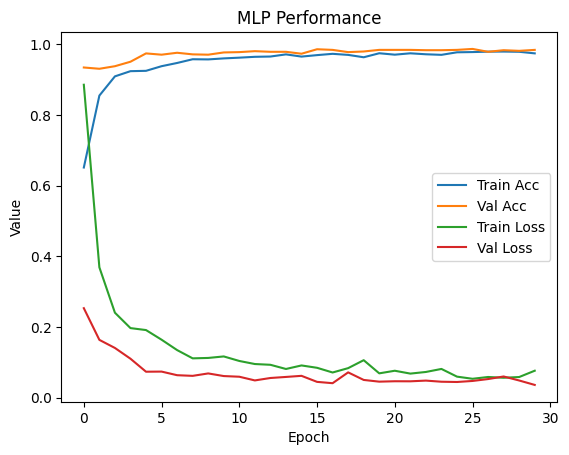

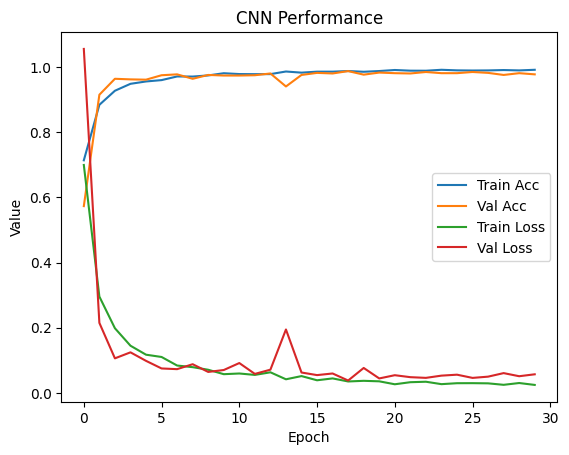

In [46]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
plot_history(history_mlp, "MLP Performance")
plot_history(history_cnn, "CNN Performance")

In [47]:
loss_mlp1, acc_mlp1 = model1_mlp.evaluate(X_val1, y_val1, verbose=0)
print(f"accuracy on mlp test data  {acc_mlp1*100:.2f}%")


loss_cnn1, acc_cnn1 = model1_cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f" accuracy on cnn test data {acc_cnn1*100:.2f}%")

accuracy on mlp test data  94.33%
 accuracy on cnn test data 97.73%


93/93 [==============================] - 0s 3ms/step


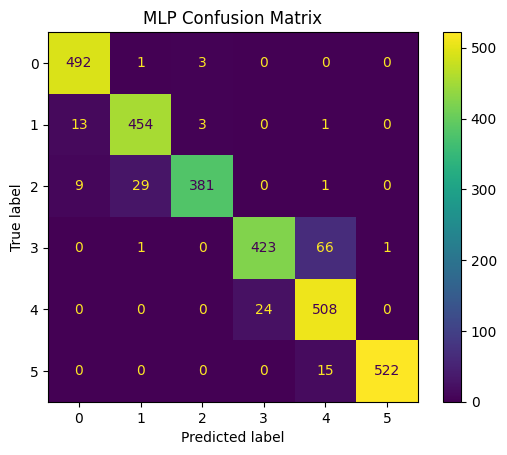

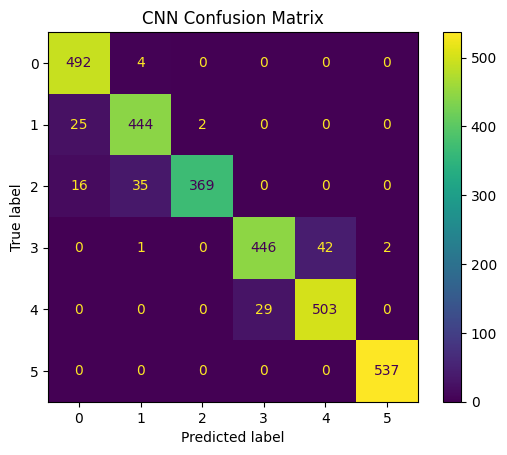

In [48]:
y_pred_mlp = model1_mlp.predict(X_val1).argmax(axis=1)
y_pred_cnn = model1_cnn.predict(X_val_cnn).argmax(axis=1)

cm_mlp = confusion_matrix(y_val1, y_pred_mlp)
cm_cnn = confusion_matrix(y_val1, y_pred_cnn)

ConfusionMatrixDisplay(cm_mlp).plot()
plt.title("MLP Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(cm_cnn).plot()
plt.title("CNN Confusion Matrix")
plt.show()

# Part two: Defects Surface Data N

In [49]:
def load_images_from_folders(base_dir, image_size=(200, 200)):
    images = []
    labels = []
    class_names = sorted(os.listdir(base_dir))  
    class_to_idx = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        for fname in os.listdir(class_dir):
            img_path = os.path.join(class_dir, fname)
            try:
                img = Image.open(img_path).convert("L").resize(image_size)
                img = np.array(img) / 255.0  
                images.append(img)
                labels.append(class_to_idx[class_name])
            except Exception as e:
                print(f"error, image not found{img_path}: {e}")

    images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)
    labels = np.array(labels)
    return images, labels, class_names

train_dir = 'NEU-DET Dataset/NEU-DET/train/images'
val_dir = 'NEU-DET Dataset/NEU-DET/validation/images'

Xtrain2, ytrain2, class_names = load_images_from_folders(train_dir)
X_val2, y_val2, _ = load_images_from_folders(val_dir)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtrain2, ytrain2, test_size=0.15, random_state=42)


print("Train set:", X_train2.shape, y_train2.shape)
print("Validation set:", X_test2.shape, y_test2.shape)
print("Classes:", class_names)

Train set: (1224, 200, 200, 1) (1224,)
Validation set: (216, 200, 200, 1) (216,)
Classes: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [50]:
model2_mlp = Sequential([
    Flatten(input_shape=(200, 200, 1)),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(6, activation='softmax')
])

model2_mlp.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model2_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model2_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
history2_mlp = model2_mlp.fit(X_train2, y_train2, epochs=35, validation_data=(X_test2, y_test2))

Epoch 1/35
39/39 [==============================] - 4s 81ms/step - loss: 1.4856 - accuracy: 0.4322 - val_loss: 13.0810 - val_accuracy: 0.2083
Epoch 2/35
39/39 [==============================] - 3s 79ms/step - loss: 1.1770 - accuracy: 0.5719 - val_loss: 5.0522 - val_accuracy: 0.2361
Epoch 3/35
39/39 [==============================] - 3s 77ms/step - loss: 1.0981 - accuracy: 0.5842 - val_loss: 5.3344 - val_accuracy: 0.2500
Epoch 4/35
39/39 [==============================] - 3s 78ms/step - loss: 1.0405 - accuracy: 0.6152 - val_loss: 2.7309 - val_accuracy: 0.3704
Epoch 5/35
39/39 [==============================] - 3s 80ms/step - loss: 0.9589 - accuracy: 0.6511 - val_loss: 2.5007 - val_accuracy: 0.3704
Epoch 6/35
39/39 [==============================] - 3s 80ms/step - loss: 0.9059 - accuracy: 0.6626 - val_loss: 4.5533 - val_accuracy: 0.2407
Epoch 7/35
39/39 [==============================] - 3s 78ms/step - loss: 0.8685 - accuracy: 0.6642 - val_loss: 2.4630 - val_accuracy: 0.3935
Epoch 8/35
3

In [53]:
history2_cnn = model2_cnn.fit(X_train2, y_train2, epochs=35, validation_data=(X_test2, y_test2))

Epoch 1/35
39/39 [==============================] - 21s 503ms/step - loss: 20.6500 - accuracy: 0.5008 - val_loss: 68.0038 - val_accuracy: 0.2083
Epoch 2/35
39/39 [==============================] - 19s 499ms/step - loss: 6.8930 - accuracy: 0.6683 - val_loss: 121.4019 - val_accuracy: 0.1528
Epoch 3/35
39/39 [==============================] - 20s 505ms/step - loss: 3.1791 - accuracy: 0.7263 - val_loss: 102.2512 - val_accuracy: 0.1528
Epoch 4/35
39/39 [==============================] - 20s 501ms/step - loss: 1.7004 - accuracy: 0.7124 - val_loss: 54.4032 - val_accuracy: 0.1991
Epoch 5/35
39/39 [==============================] - 20s 516ms/step - loss: 0.8813 - accuracy: 0.7467 - val_loss: 46.2369 - val_accuracy: 0.3009
Epoch 6/35
39/39 [==============================] - 20s 512ms/step - loss: 0.8307 - accuracy: 0.7263 - val_loss: 41.3044 - val_accuracy: 0.2870
Epoch 7/35
39/39 [==============================] - 19s 499ms/step - loss: 0.8210 - accuracy: 0.6993 - val_loss: 44.0918 - val_accura

In [54]:
model2_cnn2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.4), 

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.4),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5), 
    Dense(6, activation='softmax')
])

model2_cnn2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2_cnn2 = model2_cnn2.fit(X_train2, y_train2, epochs=35, validation_data=(X_test2, y_test2))

Epoch 1/35
39/39 [==============================] - 19s 472ms/step - loss: 33.5138 - accuracy: 0.4085 - val_loss: 35.6218 - val_accuracy: 0.2963
Epoch 2/35
39/39 [==============================] - 18s 464ms/step - loss: 24.2983 - accuracy: 0.5482 - val_loss: 74.5848 - val_accuracy: 0.2083
Epoch 3/35
39/39 [==============================] - 18s 463ms/step - loss: 22.7484 - accuracy: 0.5621 - val_loss: 103.7371 - val_accuracy: 0.1713
Epoch 4/35
39/39 [==============================] - 18s 463ms/step - loss: 16.8537 - accuracy: 0.5507 - val_loss: 90.5957 - val_accuracy: 0.1713
Epoch 5/35
39/39 [==============================] - 18s 465ms/step - loss: 10.2219 - accuracy: 0.6127 - val_loss: 126.0210 - val_accuracy: 0.1713
Epoch 6/35
39/39 [==============================] - 18s 464ms/step - loss: 7.2415 - accuracy: 0.5866 - val_loss: 84.1381 - val_accuracy: 0.1713
Epoch 7/35
39/39 [==============================] - 18s 465ms/step - loss: 6.7881 - accuracy: 0.5801 - val_loss: 85.1066 - val_ac

In [55]:
model2_cnn_fact = Sequential([
    Conv2D(32, (3,1), padding='same', activation='relu', input_shape=(200, 200, 1)),
    Conv2D(32, (1,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,1), padding='same', activation='relu'),
    Conv2D(64, (1,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,1), padding='same', activation='relu'),
    Conv2D(128, (1,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model2_cnn_fact.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2_cnn_fact = model2_cnn_fact.fit(X_train2, y_train2, epochs=30, validation_data=(X_test2, y_test2))

Epoch 1/30
39/39 [==============================] - 30s 727ms/step - loss: 27.7064 - accuracy: 0.4779 - val_loss: 42.4761 - val_accuracy: 0.1713
Epoch 2/30
39/39 [==============================] - 27s 698ms/step - loss: 8.4111 - accuracy: 0.7018 - val_loss: 73.1347 - val_accuracy: 0.1528
Epoch 3/30
39/39 [==============================] - 27s 695ms/step - loss: 3.0451 - accuracy: 0.7100 - val_loss: 57.3018 - val_accuracy: 0.1528
Epoch 4/30
39/39 [==============================] - 27s 697ms/step - loss: 1.1065 - accuracy: 0.6650 - val_loss: 58.7875 - val_accuracy: 0.1528
Epoch 5/30
39/39 [==============================] - 27s 696ms/step - loss: 1.0383 - accuracy: 0.6389 - val_loss: 36.4669 - val_accuracy: 0.0648
Epoch 6/30
39/39 [==============================] - 27s 698ms/step - loss: 0.7818 - accuracy: 0.7190 - val_loss: 35.3575 - val_accuracy: 0.0926
Epoch 7/30
39/39 [==============================] - 27s 701ms/step - loss: 0.6719 - accuracy: 0.7647 - val_loss: 35.9426 - val_accuracy

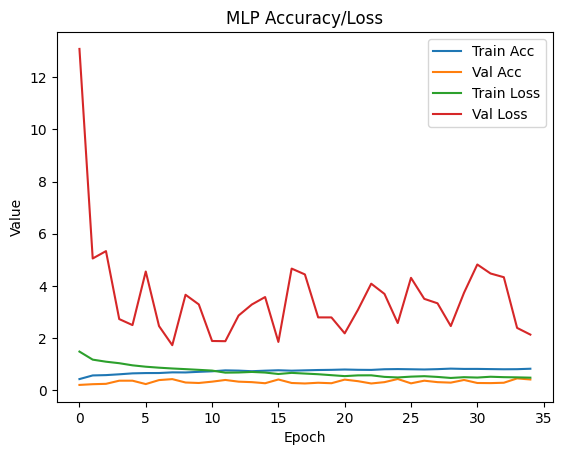

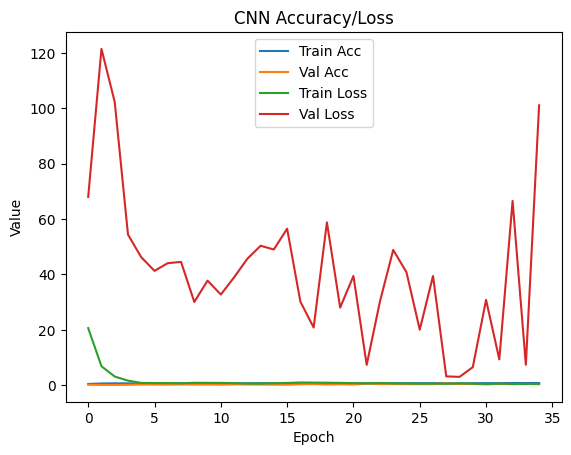

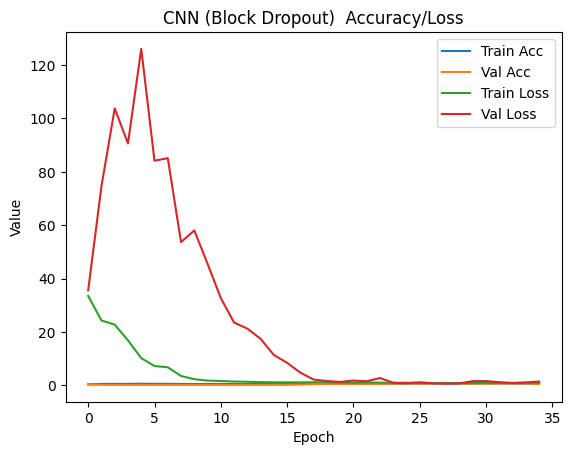

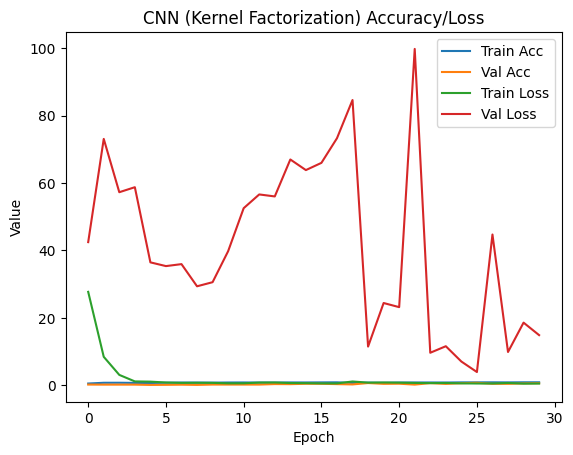

In [56]:
plot_history(history2_mlp, "MLP Accuracy/Loss")
plot_history(history2_cnn, "CNN Accuracy/Loss")
plot_history(history2_cnn2, "CNN (Block Dropout)  Accuracy/Loss")
plot_history(history2_cnn_fact, "CNN (Kernel Factorization) Accuracy/Loss")

In [57]:
loss_mlp, acc_mlp = model2_mlp.evaluate(X_val2, y_val2, verbose=0)
print(f"accuracy on mlp test data  {acc_mlp*100:.2f}%")

loss_cnn, acc_cnn = model2_cnn.evaluate(X_val2, y_val2, verbose=0)
print(f" accuracy on cnn test data {acc_cnn*100:.2f}%")

loss_cnn, acc_cnn = model2_cnn2.evaluate(X_val2, y_val2, verbose=0)
print(f" accuracy on cnn (Block Dropout) test data {acc_cnn*100:.2f}%")

loss_cnn, acc_cnn = model2_cnn_fact.evaluate(X_val2, y_val2, verbose=0)
print(f" accuracy on cnn (Kernel Factorization) test data {acc_cnn*100:.2f}%")

accuracy on mlp test data  40.83%
 accuracy on cnn test data 39.17%
 accuracy on cnn (Block Dropout) test data 56.94%
 accuracy on cnn (Kernel Factorization) test data 55.28%


12/12 [==============================] - 0s 5ms/step


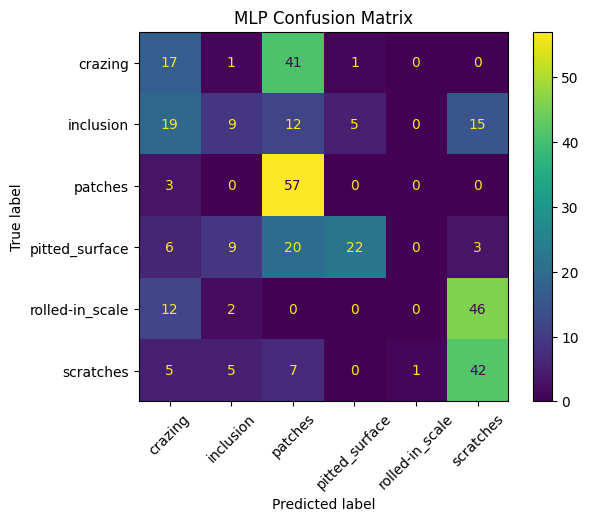

12/12 [==============================] - 1s 89ms/step


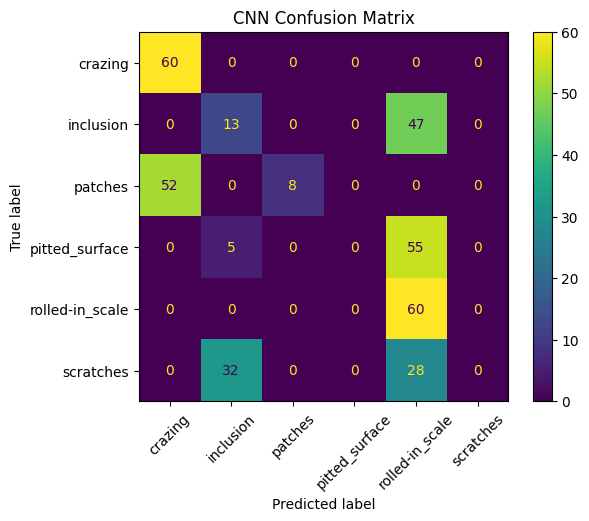

12/12 [==============================] - 1s 87ms/step


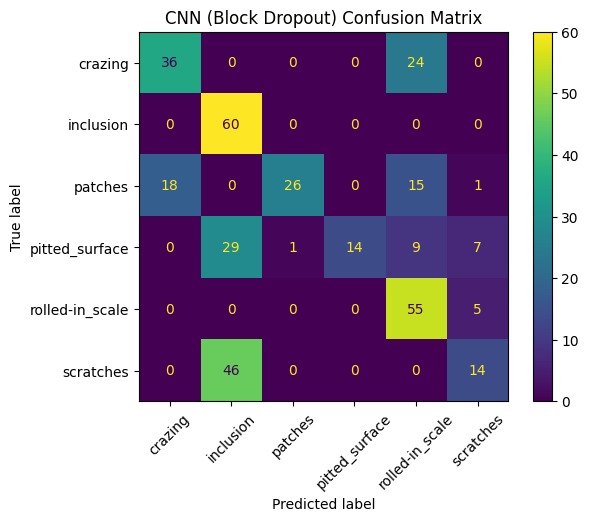

12/12 [==============================] - 2s 117ms/step


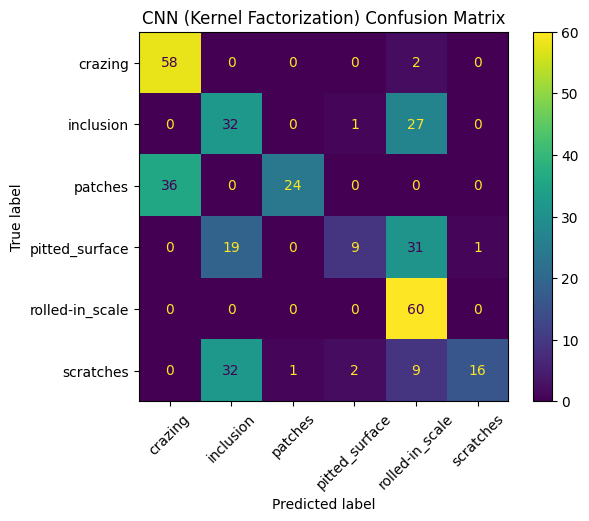

In [58]:
def show_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test).argmax(axis=1)
    y_true = y_test
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(xticks_rotation=45)
    plt.title(title)
    plt.show()

show_conf_matrix(model2_mlp, X_val2, y_val2, "MLP Confusion Matrix")
show_conf_matrix(model2_cnn, X_val2, y_val2, "CNN Confusion Matrix")
show_conf_matrix(model2_cnn2, X_val2, y_val2, "CNN (Block Dropout) Confusion Matrix")
show_conf_matrix(model2_cnn_fact, X_val2, y_val2, "CNN (Kernel Factorization) Confusion Matrix")

# part3 :transfer Learning 

In [59]:
train_dir = 'NEU-DET Dataset/NEU-DET/train/images'
val_dir = 'NEU-DET Dataset/NEU-DET/validation/images'

img_size = (224, 224)  
batch_size = 32

def load_dataset(base_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(base_dir))
    class_to_idx = {cls: i for i, cls in enumerate(class_names)}

    for cls in class_names:
        cls_dir = os.path.join(base_dir, cls)
        for fname in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, fname)
            img = Image.open(img_path).convert('RGB').resize(img_size)
            images.append(np.array(img))
            labels.append(class_to_idx[cls])

    return np.array(images), np.array(labels), class_names

X_train, y_train, class_names = load_dataset(train_dir)
X_val, y_val, _ = load_dataset(val_dir)
print("Train:", X_train.shape, "Val:", X_val.shape)

Train: (1440, 224, 224, 3) Val: (360, 224, 224, 3)


In [60]:
X_train = X_train / 255.0
X_val = X_val / 255.0

train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

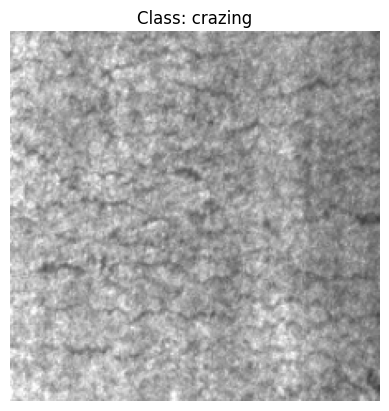

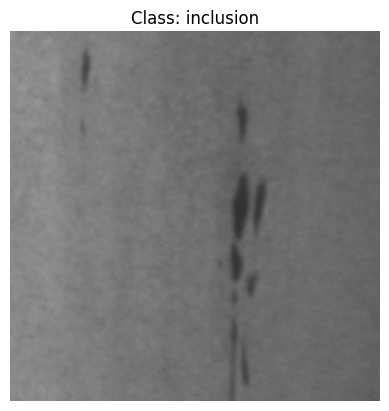

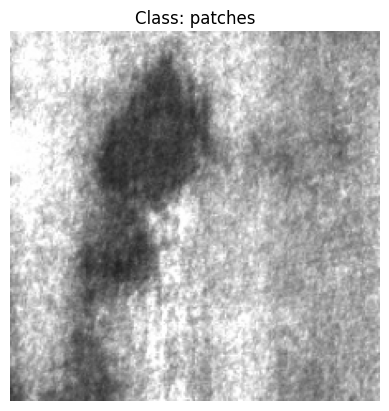

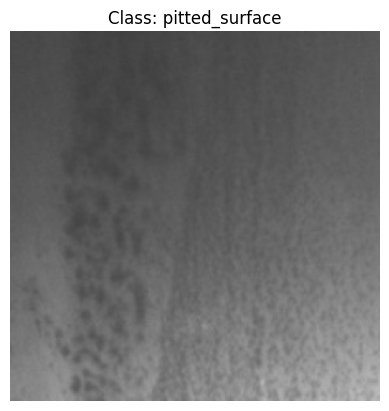

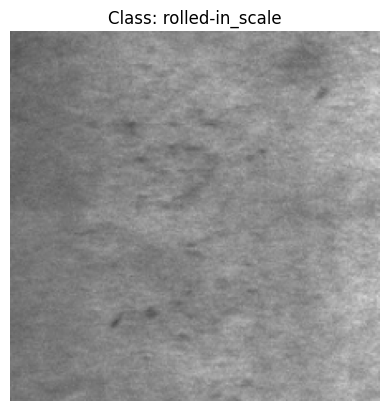

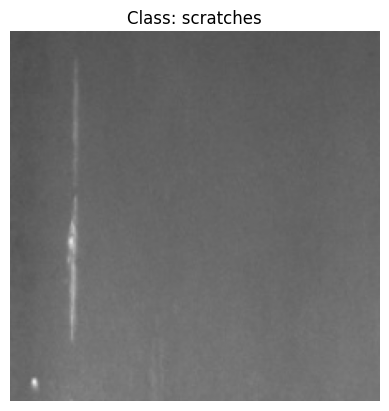

In [61]:
for i, class_name in enumerate(class_names):
    idx = np.where(y_train == i)[0][0]
    plt.imshow(X_train[idx])
    plt.title(f"Class: {class_name}")
    plt.axis("off")
    plt.show()


base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [62]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(6, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [63]:
history_resnet_head = model_resnet.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
45/45 [==============================] - 47s 999ms/step - loss: 1.9154 - accuracy: 0.1694 - val_loss: 1.7970 - val_accuracy: 0.1528
Epoch 2/20
45/45 [==============================] - 44s 975ms/step - loss: 1.8278 - accuracy: 0.1847 - val_loss: 1.7551 - val_accuracy: 0.1917
Epoch 3/20
45/45 [==============================] - 43s 963ms/step - loss: 1.7970 - accuracy: 0.1931 - val_loss: 1.7362 - val_accuracy: 0.3389
Epoch 4/20
45/45 [==============================] - 44s 968ms/step - loss: 1.7676 - accuracy: 0.2257 - val_loss: 1.7301 - val_accuracy: 0.1667
Epoch 5/20
45/45 [==============================] - 44s 967ms/step - loss: 1.7609 - accuracy: 0.2118 - val_loss: 1.7105 - val_accuracy: 0.3167
Epoch 6/20
45/45 [==============================] - 44s 969ms/step - loss: 1.7204 - accuracy: 0.2458 - val_loss: 1.8217 - val_accuracy: 0.1667
Epoch 7/20
45/45 [==============================] - 44s 972ms/step - loss: 1.7245 - accuracy: 0.2438 - val_loss: 1.6484 - val_accuracy: 0.3333

In [64]:
for layer in base_model.layers[-20:]:  
    layer.trainable = True

model_resnet.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet_ft = model_resnet.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
45/45 [==============================] - 54s 1s/step - loss: 3.5034 - accuracy: 0.3938 - val_loss: 1.5624 - val_accuracy: 0.3028
Epoch 2/20
45/45 [==============================] - 50s 1s/step - loss: 1.0503 - accuracy: 0.6007 - val_loss: 2.0906 - val_accuracy: 0.2194
Epoch 3/20
45/45 [==============================] - 50s 1s/step - loss: 0.8974 - accuracy: 0.6632 - val_loss: 2.5350 - val_accuracy: 0.2083
Epoch 4/20
45/45 [==============================] - 51s 1s/step - loss: 0.7985 - accuracy: 0.6819 - val_loss: 2.7842 - val_accuracy: 0.1778
Epoch 5/20
45/45 [==============================] - 51s 1s/step - loss: 0.7348 - accuracy: 0.7111 - val_loss: 2.9541 - val_accuracy: 0.1667
Epoch 6/20
45/45 [==============================] - 50s 1s/step - loss: 0.6980 - accuracy: 0.7271 - val_loss: 2.9687 - val_accuracy: 0.2111
Epoch 7/20
45/45 [==============================] - 50s 1s/step - loss: 0.6863 - accuracy: 0.7431 - val_loss: 2.9802 - val_accuracy: 0.2500
Epoch 8/20
45/45 [==

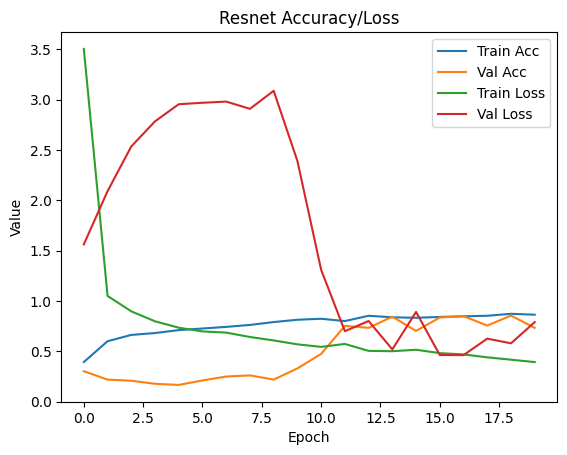

In [65]:
plot_history(history_resnet_ft, "Resnet Accuracy/Loss")

In [66]:
y_pred = model_resnet.predict(X_val).argmax(axis=1)

12/12 [==============================] - 9s 701ms/step


In [67]:
loss, acc = model_resnet.evaluate(X_val, y_val)
print(f"Accuracy: {acc:.4f} - Loss: {loss:.4f}")

12/12 [==============================] - 8s 687ms/step - loss: 0.7903 - accuracy: 0.7333
Accuracy: 0.7333 - Loss: 0.7903


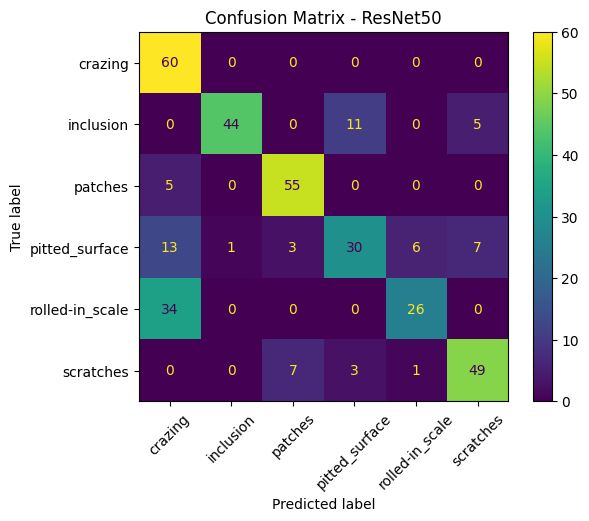

In [68]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - ResNet50")
plt.show()

In [69]:
print(classification_report(y_val, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

        crazing       0.54      1.00      0.70        60
      inclusion       0.98      0.73      0.84        60
        patches       0.85      0.92      0.88        60
 pitted_surface       0.68      0.50      0.58        60
rolled-in_scale       0.79      0.43      0.56        60
      scratches       0.80      0.82      0.81        60

       accuracy                           0.73       360
      macro avg       0.77      0.73      0.73       360
   weighted avg       0.77      0.73      0.73       360

